**Load Dataset**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import random
from keras.preprocessing.image import load_img

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
filenames = "./drive/MyDrive/flowers"

FLOWER_DAISY_DIR= filenames + '/daisy'
FLOWER_TULIP_DIR= filenames + '/tulip'
FLOWER_ROSE_DIR= filenames + '/rose'

sample1 = "/" + random.choice(os.listdir(FLOWER_DAISY_DIR))
sample2 = "/" + random.choice(os.listdir(FLOWER_TULIP_DIR))
sample3 = "/" + random.choice(os.listdir(FLOWER_ROSE_DIR))

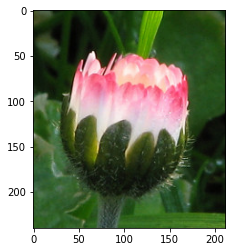

In [5]:
image = load_img(FLOWER_DAISY_DIR + sample1)
plt.imshow(image)

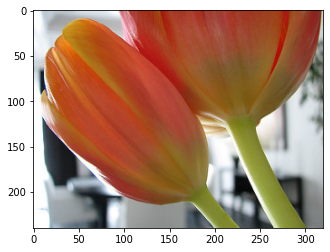

In [6]:
image = load_img(FLOWER_TULIP_DIR + sample2)
plt.imshow(image)

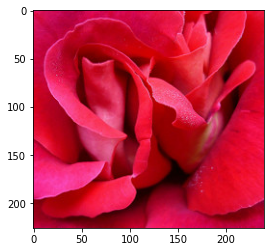

In [7]:
image = load_img(FLOWER_ROSE_DIR + sample3)
plt.imshow(image)

**Image Processing**

In [8]:
def imgtoarray(file):
  img = cv2.imread(file)
  img = cv2.resize(img,dsize=(320,240))
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img = np.array(img)
  return img

**Splitting**

In [10]:
images_train=[]
labels_train=[]
for img in os.listdir(FLOWER_DAISY_DIR)[:80]:
  arr = imgtoarray(FLOWER_DAISY_DIR + '/' + img)
  images_train.append(arr)
  labels_train.append([1,0,0])

for img in os.listdir(FLOWER_TULIP_DIR)[:80]:
  arr = imgtoarray(FLOWER_TULIP_DIR + '/' + img)
  images_train.append(arr)
  labels_train.append([0,1,0])

for img in os.listdir(FLOWER_ROSE_DIR)[:80]:
  arr = imgtoarray(FLOWER_ROSE_DIR + '/' + img)
  images_train.append(arr)
  labels_train.append([0,0,1])

images_test=[]
labels_test=[]

for img in os.listdir(FLOWER_DAISY_DIR)[80:]:
  arr = imgtoarray(FLOWER_DAISY_DIR + '/' + img)
  images_test.append(arr)
  labels_test.append([1,0,0])

for img in os.listdir(FLOWER_TULIP_DIR)[80:]:
  arr = imgtoarray(FLOWER_TULIP_DIR + '/' + img)
  images_test.append(arr)
  labels_test.append([0,1,0])

for img in os.listdir(FLOWER_ROSE_DIR)[80:]:
  arr = imgtoarray(FLOWER_ROSE_DIR + '/' + img)
  images_test.append(arr)
  labels_test.append([0,0,1])

print("Done")

Done


In [11]:
images_train = np.array(images_train)
labels_train = np.array(labels_train)
images_test = np.array(images_test)
labels_test = np.array(labels_test)
images_train.shape,images_test.shape, labels_train.shape, labels_test.shape

((240, 240, 320), (60, 240, 320), (240, 3), (60, 3))

In [12]:
images_train=images_train.reshape(240,240*320)
images_test=images_test.reshape(60,240*320)
images_train.shape,images_test.shape

((240, 76800), (60, 76800))

**Normalization**

In [13]:
import pandas as pd
feature_train = pd.DataFrame(images_train)
feature_test = pd.DataFrame(images_test)
target_train = pd.DataFrame(labels_train, columns = ['Daisy','Tulip','Rose'])
target_test = pd.DataFrame(labels_test, columns = ['Daisy','Tulip','Rose'])
feature_train = feature_train / 255
feature_test = feature_train / 255

In [14]:
feature_train.sample(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,76760,76761,76762,76763,76764,76765,76766,76767,76768,76769,76770,76771,76772,76773,76774,76775,76776,76777,76778,76779,76780,76781,76782,76783,76784,76785,76786,76787,76788,76789,76790,76791,76792,76793,76794,76795,76796,76797,76798,76799
7,0.105882,0.098039,0.090196,0.094118,0.094118,0.098039,0.098039,0.090196,0.082353,0.078431,0.074510,0.070588,0.058824,0.050980,0.047059,0.043137,0.035294,0.031373,0.023529,0.019608,0.015686,0.015686,0.015686,0.015686,0.015686,0.011765,0.007843,0.003922,0.007843,0.011765,0.019608,0.023529,0.019608,0.023529,0.031373,0.035294,0.039216,0.043137,0.043137,0.043137,...,0.305882,0.301961,0.298039,0.294118,0.290196,0.286275,0.278431,0.274510,0.266667,0.254902,0.243137,0.235294,0.223529,0.211765,0.200000,0.196078,0.184314,0.180392,0.176471,0.168627,0.164706,0.156863,0.149020,0.145098,0.133333,0.145098,0.145098,0.141176,0.137255,0.145098,0.145098,0.141176,0.141176,0.137255,0.137255,0.133333,0.133333,0.129412,0.129412,0.129412
26,0.854902,0.858824,0.866667,0.866667,0.862745,0.858824,0.854902,0.850980,0.850980,0.847059,0.843137,0.839216,0.835294,0.827451,0.823529,0.819608,0.803922,0.792157,0.756863,0.705882,0.654902,0.588235,0.498039,0.423529,0.356863,0.294118,0.247059,0.227451,0.203922,0.184314,0.172549,0.160784,0.145098,0.145098,0.137255,0.125490,0.133333,0.145098,0.141176,0.125490,...,0.411765,0.411765,0.411765,0.407843,0.407843,0.403922,0.400000,0.400000,0.400000,0.400000,0.396078,0.396078,0.392157,0.388235,0.384314,0.384314,0.372549,0.368627,0.368627,0.368627,0.368627,0.372549,0.376471,0.376471,0.372549,0.372549,0.368627,0.372549,0.376471,0.376471,0.372549,0.368627,0.356863,0.349020,0.345098,0.337255,0.317647,0.305882,0.286275,0.250980
33,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003922,0.007843,0.011765,0.015686,0.015686,0.023529,0.027451,0.027451,0.023529,0.011765,0.003922,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
237,0.105882,0.105882,0.094118,0.086275,0.090196,0.086275,0.082353,0.094118,0.094118,0.094118,0.141176,0.168627,0.364706,0.349020,0.262745,0.254902,0.250980,0.262745,0.250980,0.239216,0.278431,0.333333,0.368627,0.392157,0.407843,0.415686,0.431373,0.443137,0.443137,0.443137,0.439216,0.439216,0.439216,0.443137,0.447059,0.454902,0.462745,0.462745,0.462745,0.458824,...,0.196078,0.184314,0.180392,0.180392,0.184314,0.184314,0.188235,0.196078,0.192157,0.207843,0.207843,0.215686,0.239216,0.254902,0.266667,0.286275,0.298039,0.305882,0.333333,0.329412,0.333333,0.345098,0.329412,0.337255,0.333333,0.329412,0.321569,0.313725,0.305882,0.290196,0.274510,0.262745,0.247059,0.227451,0.203922,0.188235,0.184314,0.176471,0.164706,0.156863
15,0.388235,0.415686,0.439216,0.466667,0.474510,0.458824,0.431373,0.407843,0.380392,0.356863,0.349020,0.352941,0.341176,0.333333,0.313725,0.294118,0.270588,0.254902,0.243137,0.231373,0.223529,0.227451,0.231373,0.235294,0.243137,0.262745,0.286275,0.313725,0.337255,0.356863,0.376471,0.372549,0.372549,0.352941,0.317647,0.286275,0.270588,0.282353,0.309804,0.345098,...,0.015686,0.015686,0.019608,0.019608,0.023529,0.023529,0.027451,0.023529,0.019608,0.019608,0.019608,0.015686,0.011765,0.007843,0.007843,0.007843,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.000000,0.000000,0.003922,0.003922,0.003922,0.000000,0.000000,0.003922,0.003922,0.003922,0.003922,0.003922


In [ ]:
feature_test.sample(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,76760,76761,76762,76763,76764,76765,76766,76767,76768,76769,76770,76771,76772,76773,76774,76775,76776,76777,76778,76779,76780,76781,76782,76783,76784,76785,76786,76787,76788,76789,76790,76791,76792,76793,76794,76795,76796,76797,76798,76799
177,0.002784,0.002768,0.002768,0.002784,0.002799,0.002830,0.002860,0.002876,0.002907,0.002907,0.002768,0.003383,0.003614,0.003552,0.003660,0.003691,0.003799,0.003768,0.003783,0.003845,0.003860,0.003814,0.003768,0.003768,0.003691,0.003722,0.003552,0.003445,0.003491,0.003322,0.003445,0.003260,0.003214,0.003245,0.003245,0.003276,0.003353,0.003337,0.003260,0.003245,...,0.002184,0.002199,0.002199,0.002184,0.002153,0.002138,0.002138,0.002153,0.002153,0.002122,0.002107,0.002107,0.002138,0.002168,0.002153,0.002138,0.002168,0.002168,0.002168,0.002153,0.002122,0.002076,0.002061,0.002045,0.002107,0.002107,0.002092,0.002061,0.002076,0.002092,0.002076,0.002030,0.002045,0.002322,0.002153,0.002230,0.002030,0.001876,0.001938,0.001922
85,0.001184,0.001215,0.001215,0.001215,0.001215,0.001200,0.001215,0.001215,0.001246,0.001230,0.001230,0.001246,0.001246,0.001230,0.001246,0.001276,0.001292,0.001307,0.001215,0.001123,0.001046,0.001000,0.001092,0.001230,0.001292,0.001307,0.001338,0.001338,0.001323,0.001323,0.001323,0.001323,0.001338,0.001338,0.001338,0.001353,0.001353,0.001353,0.001353,0.001353,...,0.000354,0.000369,0.000277,0.000800,0.001092,0.001184,0.001107,0.001123,0.000953,0.000415,0.000354,0.000354,0.000354,0.000338,0.000323,0.000338,0.000338,0.000338,0.000323,0.000338,0.000338,0.000323,0.000323,0.000323,0.000323,0.000323,0.000323,0.000323,0.000323,0.000323,0.000338,0.000338,0.000323,0.000338,0.000323,0.000323,0.000323,0.000323,0.000323,0.000308
181,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000031,0.000031,0.000031,0.000031,0.000046,0.000046,0.000046,0.000046
175,0.002030,0.001968,0.002030,0.002045,0.001999,0.002061,0.002045,0.002030,0.002015,0.001999,0.002015,0.002030,0.002015,0.002015,0.001999,0.002015,0.002015,0.001999,0.002030,0.002015,0.002015,0.001984,0.002015,0.002015,0.002030,0.002015,0.002076,0.002030,0.002030,0.002061,0.002076,0.002061,0.002045,0.002061,0.002107,0.002061,0.002092,0.002092,0.002092,0.002061,...,0.003060,0.003091,0.003091,0.003091,0.003091,0.003076,0.003091,0.003106,0.003106,0.003106,0.003091,0.003091,0.003091,0.003106,0.003106,0.003106,0.003122,0.003091,0.003091,0.003122,0.003091,0.003106,0.003106,0.003122,0.003106,0.003106,0.003106,0.003106,0.003122,0.003106,0.003137,0.003122,0.003106,0.003122,0.003076,0.003106,0.003122,0.003122,0.003106,0.003076
202,0.001046,0.001061,0.001123,0.001153,0.001184,0.001215,0.001230,0.001261,0.001261,0.001292,0.001292,0.001276,0.001292,0.001276,0.001276,0.001276,0.001261,0.001246,0.001230,0.001230,0.001246,0.001230,0.001215,0.001200,0.001200,0.001200,0.001184,0.001169,0.001184,0.001138,0.001153,0.001138,0.001138,0.001138,0.001138,0.001138,0.001138,0.001123,0.001138,0.001107,...,0.001630,0.001676,0.001646,0.001630,0.001646,0.001630,0.001630,0.001630,0.001615,0.001615,0.001599,0.001615,0.001615,0.001615,0.001615,0.001630,0.001692,0.001646,0.001599,0.001599,0.001584,0.001599,0.001615,0.001615,0.001599,0.001599,0.001584,0.001569,0.001553,0.001507,0.001538,0.001507,0.001461,0.001446,0.001399,0.001338,0.001307,0.001261,0.001200,0.001138


In [15]:
target_train.sample(5)

,Daisy,Tulip,Rose
212,0,0,1
124,0,1,0
86,0,1,0
128,0,1,0
65,1,0,0


In [16]:
target_test.sample(5)

,Daisy,Tulip,Rose
59,0,0,1
14,1,0,0
3,1,0,0
38,0,1,0
51,0,0,1


**Initialization**

In [17]:
import random

theta1 = [0.0001] * 76800
theta2 = [0.0001] * 76800
theta3 = [0.0001] * 76800

random.seed(3031)
bias1 = random.random()
random.seed(7819)
bias2 = random.random()
random.seed(1011)
bias3 = random.random()

**FeedForward Sigmoid Activation\Error Function\Prediction**

In [18]:
def result(rows):
  result1 = sum(feature_train.iloc[rows] * theta1) + bias1 
  result2 = sum(feature_train.iloc[rows] * theta2) + bias2
  result3 = sum(feature_train.iloc[rows] * theta3) + bias3

  return result1,result2,result3

def activation(rows):
  result1,result2,result3 = result(rows)
  sig1 = 1/(1+np.exp(-result1))
  sig2 = 1/(1+np.exp(-result2))
  sig3 = 1/(1+np.exp(-result3))
  return sig1, sig2, sig3

def bigger(x):
  if x > 0.5:
    return 1
  else:
    return 0

def prediction(rows):
  sig1, sig2, sig3 = activation(rows)
  pred1 = bigger(sig1)
  pred2 = bigger(sig2)
  pred3 = bigger(sig3)
  return pred1 ,pred2 ,pred3 

def result_hidden(rows):
  sig1, sig2, sig3 = activation(rows)
  result1 = sig1 * theta1[rows] + bias1 
  result2 = sig2 * theta1[rows] + bias2
  result3 = sig3 * theta1[rows] + bias3

  return result1,result2,result3

def activation_hidden(rows):
  result1,result2,result3 = result_hidden(rows)
  sig1 = 1/(1+np.exp(-result1))
  sig2 = 1/(1+np.exp(-result2))
  sig3 = 1/(1+np.exp(-result3))
  return sig1, sig2, sig3

def prediction_hidden(rows):
  sig1, sig2, sig3 = activation_hidden(rows)
  pred1 = bigger(sig1)
  pred2 = bigger(sig2)
  pred3 = bigger(sig3)
  return pred1 ,pred2 ,pred3

def error_hidden(rows):
  sig1, sig2, sig3 = activation_hidden(rows)
  error1 = (sig1 - labels_train[rows][0])**2
  error2 = (sig2 - labels_train[rows][1])**2
  error3 = (sig3 - labels_train[rows][2])**2

  return error1,error2,error3

In [19]:
activation_hidden(0)

(0.6526346572078529, 0.5039513155918717, 0.5907380292973854)

**Back Propagation**

In [20]:
def back_output_hidden(rows, learn_rate):
	act1, act2, act3 = activation(rows)
	sig1, sig2, sig3 = activation_hidden(rows)

	dtheta1 = -2*(labels_train[rows][0] - sig1)*sig1*(1-sig1)*act1
	dtheta2 = -2*(labels_train[rows][1] - sig2)*sig2*(1-sig2)*act2
	dtheta3 = -2*(labels_train[rows][2] - sig3)*sig3*(1-sig3)*act3


	dbias1 = -2*(labels_train[rows][0] - sig1)*sig1*(1-sig1)*1
	dbias2 = -2*(labels_train[rows][1] - sig2)*sig2*(1-sig2)*1
	dbias3 = -2*(labels_train[rows][2] - sig3)*sig3*(1-sig3)*1

	ntheta1 = theta1 - (learn_rate*dtheta1)
	ntheta2 = theta2 - (learn_rate*dtheta2)
	ntheta3 = theta3 - (learn_rate*dtheta3)
	
	nbias1 = bias1 - (learn_rate*dbias1)
	nbias2 = bias2 - (learn_rate*dbias2)
	nbias3 = bias3 - (learn_rate*dbias3)

	return ntheta1, ntheta2, ntheta3, nbias1, nbias2, nbias3


def back_hidden_input(rows, learn_rate):
	act1, act2, act3 = activation(rows)
	sig1, sig2, sig3 = activation_hidden(rows)
	

	d11 = -2*(labels_train[rows][0] - sig1)*sig1*(1-sig1)*theta1
	d12 = -2*(labels_train[rows][1] - sig2)*sig2*(1-sig2)*theta1
	d13 = -2*(labels_train[rows][2] - sig3)*sig3*(1-sig3)*theta1


	d21 = -2*(labels_train[rows][0] - sig1)*sig1*(1-sig1)*theta2
	d22 = -2*(labels_train[rows][1] - sig2)*sig2*(1-sig2)*theta2
	d23 = -2*(labels_train[rows][2] - sig3)*sig3*(1-sig3)*theta2


	d31 = -2*(labels_train[rows][0] - sig1)*sig1*(1-sig1)*theta3
	d32 = -2*(labels_train[rows][1] - sig2)*sig2*(1-sig2)*theta3
	d33 = -2*(labels_train[rows][2] - sig3)*sig3*(1-sig3)*theta3

	dtheta1 = (d11+d21+d31)*act1*(1-act1)*feature_train.iloc[rows]
	dtheta2 = (d12+d22+d32)*act2*(1-act2)*feature_train.iloc[rows]
	dtheta3 = (d13+d23+d33)*act3*(1-act3)*feature_train.iloc[rows]
	
	dbias1 = (d11+d21+d31)*act1*(1-act1)*1
	dbias2 = (d12+d22+d32)*act2*(1-act2)*1
	dbias3 = (d13+d23+d33)*act3*(1-act3)*1

	ntheta1 = theta1 - (learn_rate*dtheta1)
	ntheta2 = theta2 - (learn_rate*dtheta2)
	ntheta3 = theta3 - (learn_rate*dtheta3)

	nbias1 = bias1 - (learn_rate*dbias1)
	nbias2 = bias2 - (learn_rate*dbias2)
	nbias3 = bias3 - (learn_rate*dbias3)

	return ntheta1, ntheta2, ntheta3, nbias1, nbias2, nbias3


In [ ]:
def trainnetwork(epoch, lr, train):
  sumerror=0
  acc=0
  for ep in range(epoch):
    for i in range(len(train)):

In [22]:
def accuracy(actual, predicted):
  correct=0
  for i in range(len(actual)):
    if actual[i] == predicted[i]:
      correct += 1
  return float(correct)/float(len(actual))